# Lab 3 - Basic concepts in Machine Learning
### Author: [Yunting Chiu](https://www.linkedin.com/in/yuntingchiu/)
## Exercise 1
Write a Python program to reproduce the results and figures of Example 3.6 page 98. Play with the number of training points, the degrees of the involved polynomials, and the noise variance in the regression model.


## Install the Packages


In [53]:
# Install the related libraries
#%matplotlib inline
import matplotlib as plt
import numpy as np
import math
from scipy.io import savemat

In [38]:
def generate_ground(x):
  ground = 0.1+0.6*x+0.5*x**2-0.8*x**3+0.2*x**4+0.3*x**5
  return ground

In [39]:
def betahistory(order):
  N = 10
  x = np.linspace(-1, 1, num = N)
  noise = np.sqrt(0.3)*np.random.standard_normal(N)
  ground = generate_ground(x)
  y = ground + noise
  if order == 2:
    X = np.array([np.ones(N), x, x**2]).T
  elif order == 8:
    X = np.array([np.ones(N), x, x**2, x**3, x**4, x**5, x**6, x**7, x**8]).T
  Y = np.array([y]).T
  beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
  savebeta = beta
  for i in range(999):
    noise = np.sqrt(0.3)*np.random.standard_normal(N)
    y = ground + noise
    Y = np.array([y]).T
    beta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, Y))
    savebeta = np.concatenate((savebeta, beta), axis = 1)
  beta = np.mean(savebeta, axis = 1)
  return beta, savebeta

In [40]:
def plot1000(order, x_plot, beta):
# plot depending on the order
  if order == 2:
    y_plot = np.dot(np.array([np.ones(10000), x_plot, x_plot**2]).T, beta)
  elif order == 8:
    y_plot = np.dot(np.array([np.ones(10000), x_plot, x_plot**2, x_plot**3, x_plot**4, x_plot**5, x_plot**6, x_plot**7, x_plot**8]).T, beta)
  return y_plot

beta2, beta2history = betahistory(2)
beta8, beta8history = betahistory(8)
print(beta2, beta8)

[0.0709135  0.19476554 0.71297295] [ 0.07926143  0.72005606  1.1075317  -1.48081006 -2.75235669  1.57674979
  4.78323689 -0.69521051 -2.40615209]


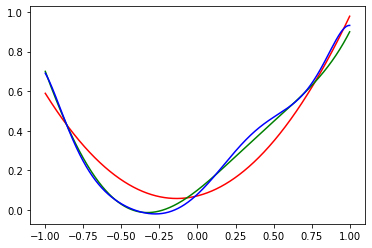

In [67]:
x_plot = np.linspace(-1, 1, num = 10000)
y_plot2 = plot1000(2, x_plot, beta2)
y_plot8 = plot1000(8, x_plot, beta8)

#plt.figure(1)
plt.pyplot.plot(x_plot, y_plot2,'r', x_plot, generate_ground(x_plot), 'g', x_plot, y_plot8, 'b') # g = green, r = red, b = blue

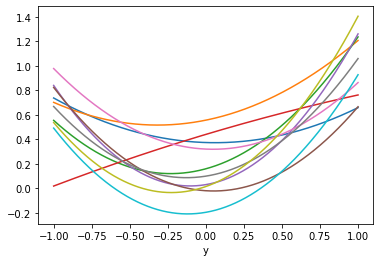

In [63]:
for i in range(10):
  plt.pyplot.plot(x_plot, plot1000(2, x_plot, beta2history[:, i]))
plt.pyplot.xlabel('x')
plt.pyplot.xlabel('y')
plt.pyplot.show()

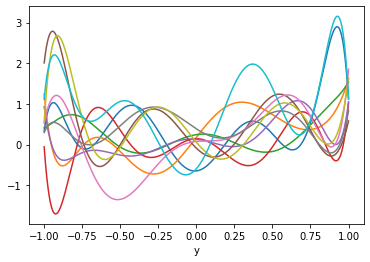

In [64]:
for i in range(10):
  plt.pyplot.plot(x_plot, plot1000(8, x_plot, beta8history[:, i]))
plt.pyplot.xlabel('x')
plt.pyplot.xlabel('y')
plt.pyplot.show()

# Testing Zone

In [17]:
# print(np.linspace(-1, 1, num = 10))
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
print(b.T)
np.concatenate((a, b.T), axis=1)

[[5]
 [6]]


array([[1, 2, 5],
       [3, 4, 6]])

In [ ]:
%%capture
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic 
!jupyter nbconvert --to pdf "/content/drive/MyDrive/American_University/2021_Fall/DATA-642-001_Advanced Machine Learning/GitHub/Labs/03/Lab3_Yunting.ipynb" 